In [28]:
from burst_detection import extract_bursts
import numpy as np
from fooof import FOOOF
import matplotlib.pylab as plt
import new_files
from mne import read_epochs
dir_search = new_files.Files()

In [7]:
path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/processed/sub-101/sub-101-007-visual-epo"
files = dir_search.get_files(path, "*.npy")
files = files[:10]

In [38]:
epo = "/home/mszul/datasets/explicit_implicit_beta/derivatives/processed/sub-101/sub-101-007-visual-epo.fif"
epochs = read_epochs(epo, verbose=False)
epochs = epochs.pick_types(meg=True, ref_meg=False, misc=False)
times = epochs.times
epochs = epochs.get_data()
epochs = epochs[:10, 11, :] # first 10 trials x sensor (11) x time

In [19]:
freqs = np.linspace(1,120, num=400)
sfreq = 600.0
search_range = np.where((freqs >= 10) & (freqs <= 33))[0]
beta_lims = [13, 30]

In [10]:
trials = []
for f in files:
    trials.append(np.load(f)[11]) # 10 trials from one sensor

In [12]:
trials = np.array(trials) # trials x frequencies (1-120) x time

In [45]:
trials.shape

(10, 400, 1801)

In [17]:
average_psd = np.average(trials, axis=(2, 0))

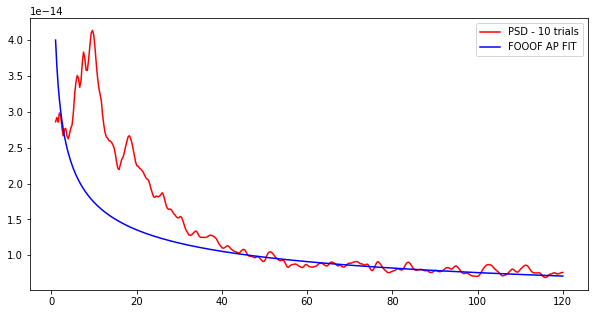

In [27]:
f, ax = plt.subplots(1 , 1, figsize=(10, 5))
ff = FOOOF()
ff.fit(freqs, average_psd, [1, 120])
ap = 10 ** ff._ap_fit 
ax.plot(freqs, average_psd, c="red", label="averaged PSD - 10 trials")
ax.plot(freqs, ap, c="blue", label="FOOOF AP FIT")
ax.legend()

In [43]:
bursts = extract_bursts(
    epochs, trials[:,search_range], times, freqs[search_range], beta_lims, ap[search_range].reshape(-1, 1), sfreq
)